<a href="https://colab.research.google.com/github/ahoucbvtw/BostonhousePrice-DecisionTreeRegression/blob/main/BostonhousePrice-DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化氮濃度（千萬分之一）

RM：住宅的平均房間數(高坪數)

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士頓就業中心的加權距離(與工作地方的距離)

RAD：到高速公路的便捷度指數

TAX：每萬元的房產稅率

PTRATIO：城鎮學生教師比例

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

data = pd.DataFrame(boston["data"], columns = boston["feature_names"])
data["answer"] = boston["target"]
data#這是類似print(data)的意思

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
x = data.drop(["answer"], axis = 1)
y = data["answer"]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


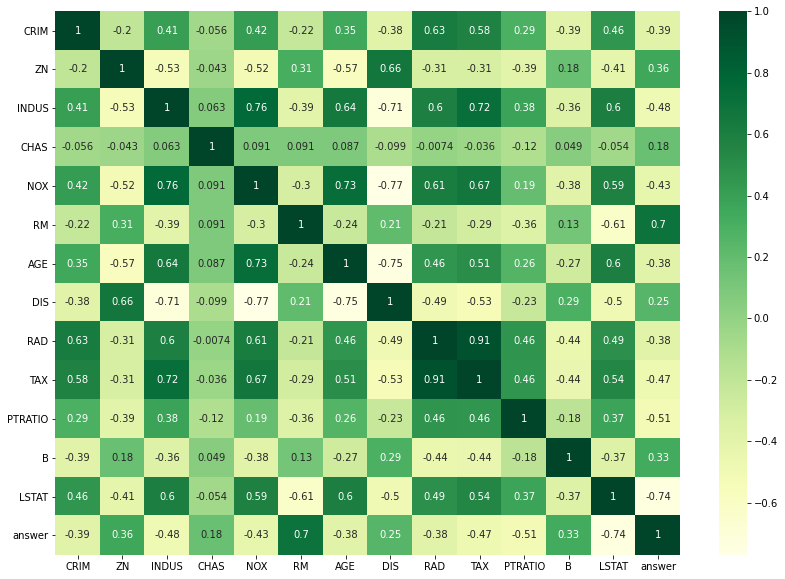

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#特殊語法,加了這個可以不用在每個圖片最後+plt.show,但是python的py檔本身有沒有支援,目前Jupyter和Colab有支援
%matplotlib inline 
plt.figure(figsize = (14,10))#更改畫圖的大小(寬*高)
sns.heatmap(data.astype("float").corr(), cmap = "YlGn", annot= True)#camp更改顏色,annot於熱度圖上標示數值
data.corr()#相關係數矩陣(pandas 內建涵式)

In [4]:
from sklearn.model_selection import train_test_split
#將資料隨機拆分成多少等份
#train_test_split([1, 2, 3, 4],[5, 6, 7, 8], test_size = 0.25)
#拆成9份訓練/1份驗證測試(random_state = 0 可以把每次切分都相同資料，但選擇還是隨機選)
#訓練和測試盡量9/1或8/2分，讓訓練資料要多一點
#[x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [5]:
from sklearn.tree import DecisionTreeRegressor
#準備演算法(設定max_depth = ?層來防止過度訓練導致驗證不准，依照各個資料來設定，欄位越多通常設定越大)
reg = DecisionTreeRegressor(max_depth = 4, random_state = 2)
#把資料帶入獲得完整模型
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

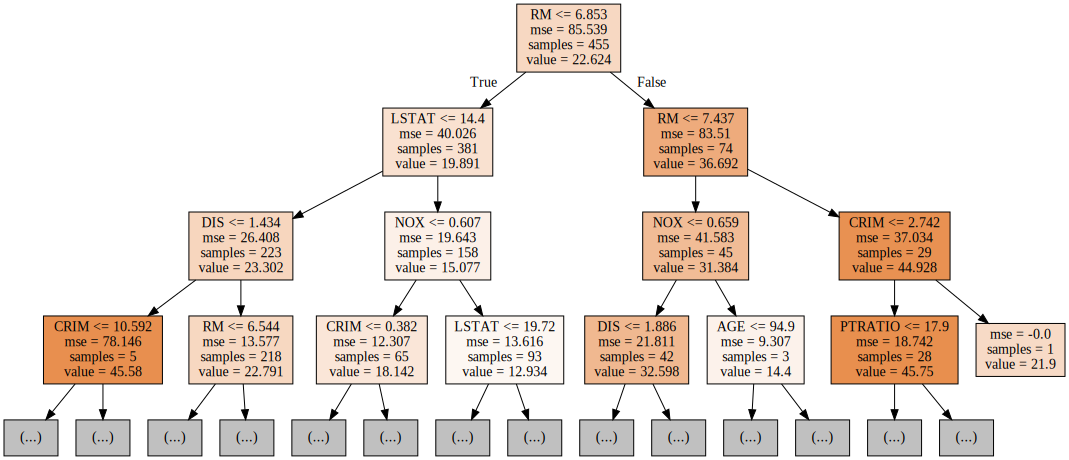

In [6]:
import graphviz
from sklearn.tree import export_graphviz
#製作一決策樹=>可以使信心程度提高說這是屬於哪個分類
#分佈率 mse = 與中心距離的信心程度，所以最後越小越準
#(1/n)*Σ(Pi-平均) ≒ 0 => 信心越大
a = export_graphviz(reg, 
                feature_names = x.columns,  
                filled = True,
                max_depth = 3)
graphviz.Source(a)

In [7]:
#拿測試資料驗證預測
from sklearn.metrics import r2_score
#RMSE = ((1/n)*Σ(預測平均-ytest)^2)^0.5 (可以將預測不準的地方放大顯示，所以表示可以推測出此模型不可行)
#MAE  = (1/n)*Σabs((預測平均-ytest))
# r² score >= 0.5以上算是比較好的模型  0(瞎猜) <= 1-(a/b) <= 1(正常)

pre = reg.predict(x_test)
r2_score(y_test, pre)
print("真正結果", list(y_test))
print("預測結果", list(pre))
print("預測r² 分數 = ", r2_score(y_test, pre))

真正結果 [20.2, 15.3, 37.3, 32.5, 8.8, 14.4, 22.0, 26.6, 15.0, 21.5, 29.4, 24.8, 22.0, 16.1, 13.9, 21.6, 21.7, 12.8, 7.2, 12.6, 20.7, 19.3, 36.5, 17.7, 16.7, 20.2, 50.0, 34.6, 35.4, 19.4, 20.8, 21.1, 31.1, 23.5, 8.3, 15.6, 11.3, 21.7, 23.2, 20.8, 22.0, 13.6, 28.7, 10.5, 23.0, 13.8, 36.4, 18.4, 30.1, 17.9, 29.9]
預測結果 [21.76497175141242, 21.76497175141242, 31.94500000000001, 27.2219512195122, 10.5875, 10.5875, 31.94500000000001, 31.94500000000001, 27.9, 21.76497175141242, 27.2219512195122, 27.2219512195122, 21.76497175141242, 21.76497175141242, 10.5875, 21.76497175141242, 16.09655172413793, 10.5875, 10.5875, 15.437777777777779, 21.76497175141242, 21.76497175141242, 31.94500000000001, 15.437777777777779, 15.437777777777779, 21.76497175141242, 46.68749999999999, 31.94500000000001, 31.94500000000001, 21.76497175141242, 21.76497175141242, 21.76497175141242, 27.2219512195122, 21.76497175141242, 10.5875, 15.437777777777779, 10.5875, 21.76497175141242, 21.76497175141242, 21.76497175141242, 27.22195